In [1]:
import os
print(os.getcwd())

/Users/yi-jutao/project


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
data = pd.read_csv("/Users/yi-jutao/project/customer_data.csv")

In [3]:
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [5]:
data.drop(columns=["id"],inplace= True)

In [10]:
data["age"].describe()

count    100000.000000
mean         30.003260
std           4.480535
min          12.000000
25%          27.000000
50%          30.000000
75%          33.000000
max          49.000000
Name: age, dtype: float64

In [19]:
education = data["education"].value_counts()
print(education)

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64


In [30]:
#find out what the average income is based on different ages, it seems like the age with highest income is 49 but lowest is 47
#which is weird that the income gap is huge for ages only two years apart.

avg_income_by_age = data.groupby("age").income.mean()
avg_income_by_age = avg_income_by_age.sort_values(ascending=False)
print(avg_income_by_age)

age
49    43524.000000
48    37478.500000
13    33677.250000
16    31760.363636
19    29078.065646
41    28631.405405
17    28478.223776
20    28082.550471
46    28010.636364
14    27895.923077
40    27834.090909
23    27800.681715
37    27767.894698
36    27708.204577
27    27696.545998
31    27659.406825
30    27600.486298
32    27523.726911
26    27522.906664
33    27473.701137
28    27464.449310
29    27442.885132
38    27431.504188
21    27397.879528
43    27391.984000
34    27348.891924
25    27336.045099
22    27326.269832
39    27217.652500
35    27190.803201
24    27178.622204
18    26840.218884
15    26299.846154
45    26167.314286
42    26033.008264
44    25179.844828
12    23832.666667
47    23441.384615
Name: income, dtype: float64


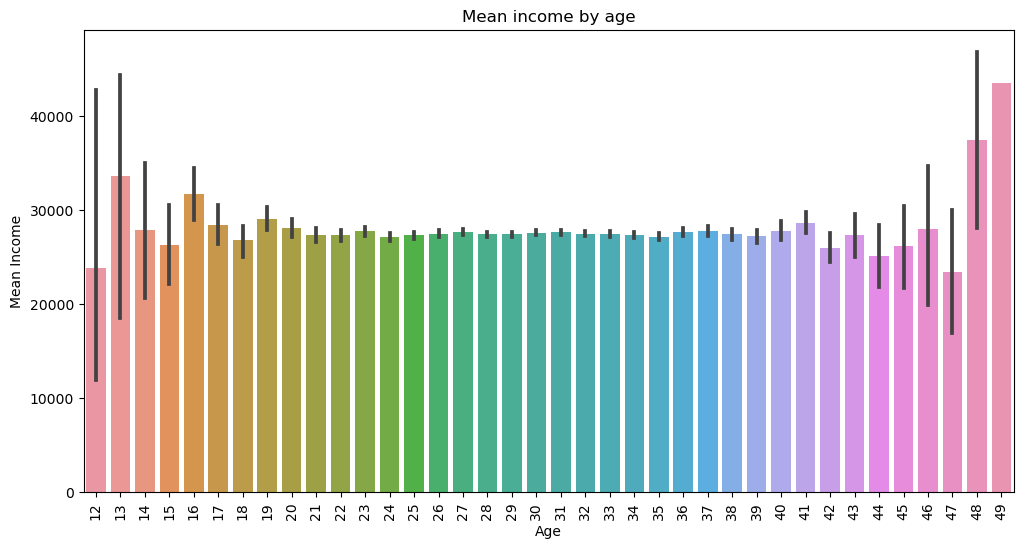

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x="age", y="income", data = data)
plt.title('Mean income by age')
plt.xlabel("Age")
plt.ylabel("Mean Income")
plt.xticks(rotation= 90)
plt.show()

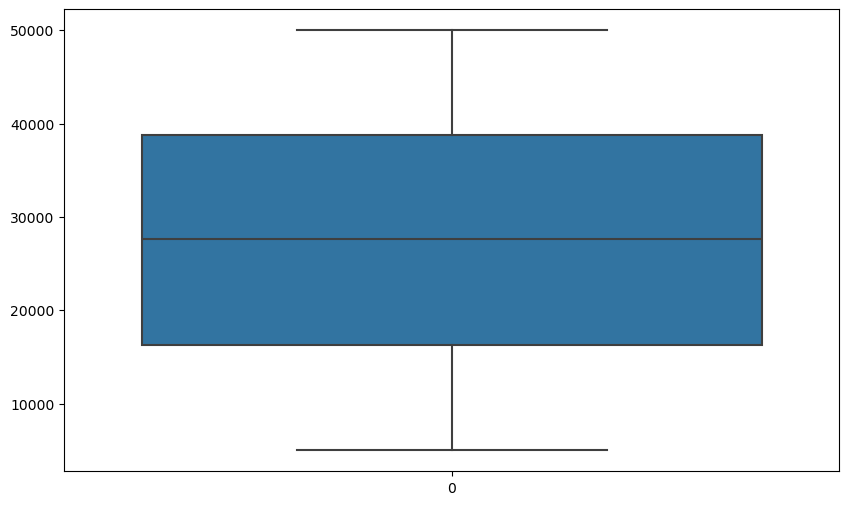

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data["income"])
plt.show()
#check if there is outliers,no outliers

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


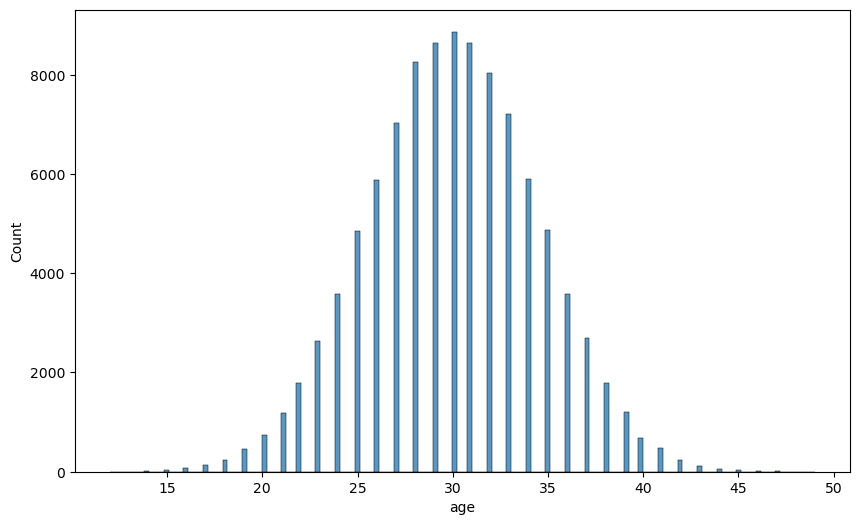

In [12]:
#age is normally distributed. 
#no bias to younger or older shoppers
#the most shopper is in 30
plt.figure(figsize=(10,6))
sns.histplot(data["age"])
plt.show()


In [13]:
data["education"].value_counts()

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [14]:
data.groupby("education").income.mean().sort_values()
#not the higher the level of education has higher income, no correlation between education level and income

education
HighSchool    27423.473616
Masters       27470.785452
College       27544.391333
Bachelor      27555.371644
Name: income, dtype: float64

In [16]:
mean_income= data.groupby("education").income.mean().reset_index().head(10)

In [17]:
print(mean_income)

    education        income
0    Bachelor  27555.371644
1     College  27544.391333
2  HighSchool  27423.473616
3     Masters  27470.785452


In [18]:
mean_income_sorted= mean_income.sort_values(by= "income",ascending = False)
print(mean_income_sorted)

    education        income
0    Bachelor  27555.371644
1     College  27544.391333
3     Masters  27470.785452
2  HighSchool  27423.473616


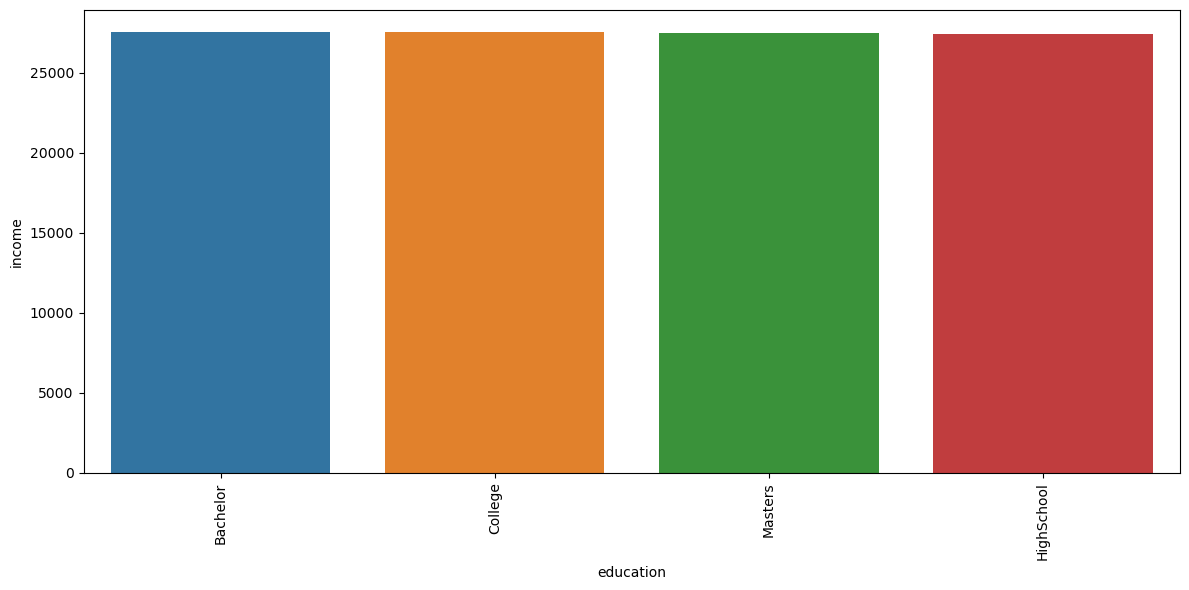

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(x="education", y="income", data = mean_income_sorted)
plt.xlabel("education")
plt.ylabel("income")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [31]:
data.drop(columns=["id"],inplace= True)
data.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [ ]:
#Gender

In [33]:
data["gender"].value_counts()

gender
Female    50074
Male      49926
Name: count, dtype: int64

In [36]:
income_by_gender= data.groupby('gender').income.mean()
income_by_gender

gender
Female    27507.945441
Male      27524.618996
Name: income, dtype: float64

In [ ]:
#Region

In [37]:
data["region"].value_counts()

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [41]:
age_by_region= data.groupby("region").age.mean().reset_index().sort_values(by='age',ascending = True)
age_by_region

,region,age
3,West,29.960114
2,South,29.976287
0,East,30.037175
1,North,30.044081


In [46]:
income_by_region= data.groupby('region')['income'].mean().sort_values()
income_by_region

region
West     27411.793686
East     27467.802853
South    27591.942460
North    27670.206848
Name: income, dtype: float64

In [47]:
#loyalty_status vs income
income_by_loyalty_status= data.groupby('loyalty_status')["income"].mean().sort_values()
income_by_loyalty_status

loyalty_status
Gold       27434.735401
Silver     27492.881157
Regular    27541.343011
Name: income, dtype: float64

In [48]:
#loyalty and purchase frequency
loyalty_by_frequency= data.groupby('loyalty_status')['purchase_frequency'].value_counts()
loyalty_by_frequency

loyalty_status  purchase_frequency
Gold            rare                   4974
                occasional             2932
                frequent               1992
Regular         rare                  30112
                occasional            18037
                frequent              11989
Silver          rare                  14933
                occasional             8917
                frequent               6114
Name: count, dtype: int64

In [49]:
#product_category
product_mean_amount= data.groupby("product_category")['purchase_amount'].mean().sort_values()
product_mean_amount

product_category
Home           9538.173262
Books          9592.935678
Health         9610.963647
Clothing       9634.595327
Electronics    9648.226696
Food           9669.953110
Beauty         9721.366038
Name: purchase_amount, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1200x600 with 0 Axes>

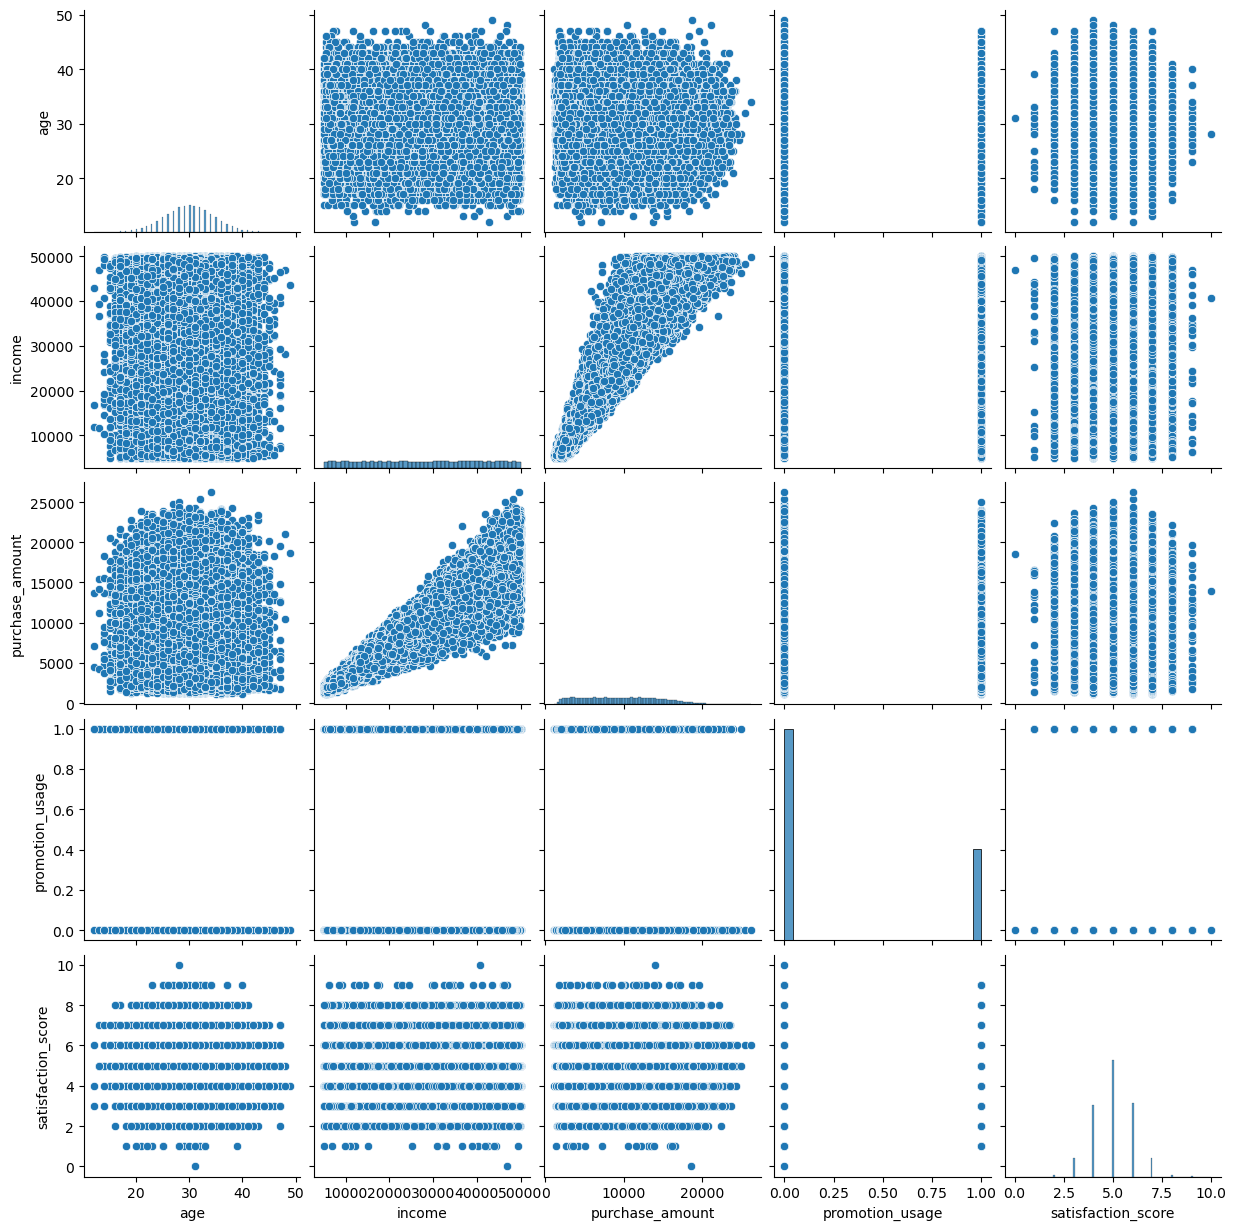

In [51]:
plt.figure(figsize=(12,6))
sns.pairplot(data)
plt.show()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


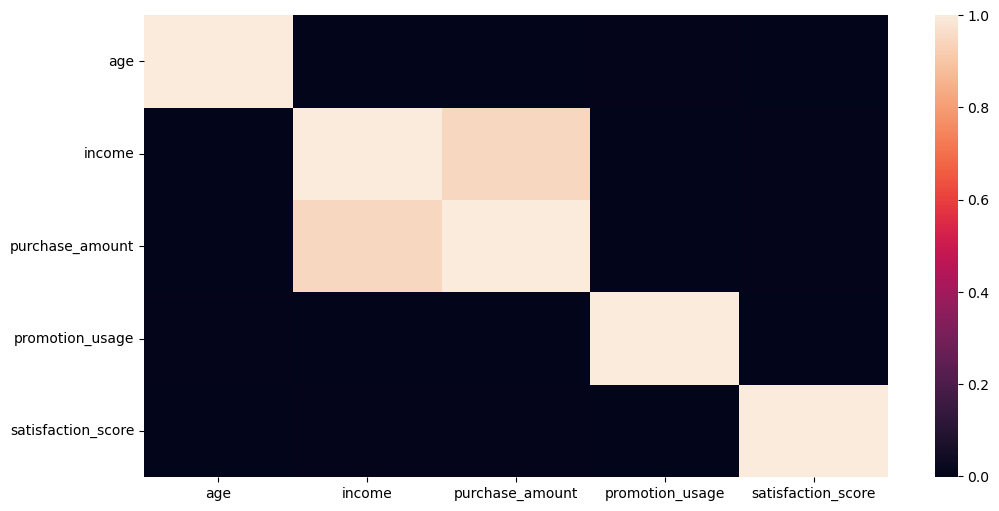

In [54]:
num_cols= data.select_dtypes(["int","float","int64"])
plt.figure(figsize=(12,6))
sns.heatmap(num_cols.corr())
plt.show()
#income and purchase_amount have correlation

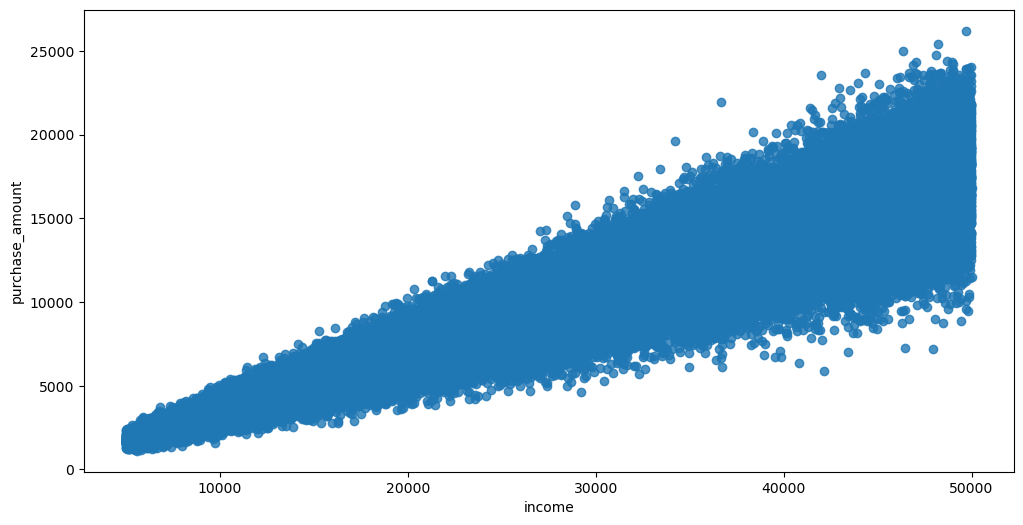

In [56]:
#relationship between purchase amount and income
plt.figure(figsize=(12,6))
sns.regplot(x=data['income'],y=data["purchase_amount"])
plt.show()

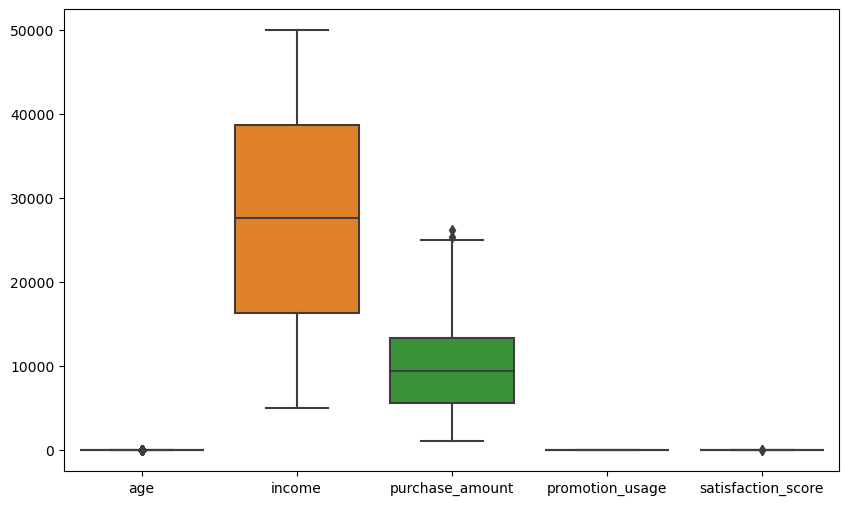

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()

In [ ]:
#model

In [59]:
#standardlize income and purchase_amount

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
numerical_columns = ['income',"purchase_amount"]
data[numerical_columns] = sc.fit_transform(data[numerical_columns])
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,0.792933,Bachelor,East,Gold,frequent,0.682891,Books,0,6
1,2,29,Male,0.229267,Masters,West,Regular,rare,0.137088,Clothing,1,6
2,3,37,Male,0.752200,Bachelor,West,Silver,rare,0.426692,Clothing,0,6
3,4,30,Male,0.145956,HighSchool,South,Regular,frequent,0.118791,Food,0,7
4,5,31,Female,0.932267,College,North,Regular,occasional,0.740134,Clothing,1,5


In [60]:
#change gender type to category and create dummy variables
data["gender"]= data["gender"].astype('category')
data = pd.get_dummies(data,columns=["gender"], prefix="gender")
data.head()

,id,age,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_Female,gender_Male
0,1,27,0.792933,Bachelor,East,Gold,frequent,0.682891,Books,0,6,False,True
1,2,29,0.229267,Masters,West,Regular,rare,0.137088,Clothing,1,6,False,True
2,3,37,0.752200,Bachelor,West,Silver,rare,0.426692,Clothing,0,6,False,True
3,4,30,0.145956,HighSchool,South,Regular,frequent,0.118791,Food,0,7,False,True
4,5,31,0.932267,College,North,Regular,occasional,0.740134,Clothing,1,5,True,False


In [61]:
#change region type to category and create dummy variables
data["region"]= data["region"].astype("category")
data= pd.get_dummies(data,columns=["region"], prefix ='region')
data.head()

,id,age,income,education,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_Female,gender_Male,region_East,region_North,region_South,region_West
0,1,27,0.792933,Bachelor,Gold,frequent,0.682891,Books,0,6,False,True,True,False,False,False
1,2,29,0.229267,Masters,Regular,rare,0.137088,Clothing,1,6,False,True,False,False,False,True
2,3,37,0.752200,Bachelor,Silver,rare,0.426692,Clothing,0,6,False,True,False,False,False,True
3,4,30,0.145956,HighSchool,Regular,frequent,0.118791,Food,0,7,False,True,False,False,True,False
4,5,31,0.932267,College,Regular,occasional,0.740134,Clothing,1,5,True,False,False,True,False,False


In [62]:
#same for education and loyalty status
data["education"] = data["education"].astype("category")
data = pd.get_dummies(data,columns=["education"],prefix= "education")
data.head()

,id,age,income,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_Female,gender_Male,region_East,region_North,region_South,region_West,education_Bachelor,education_College,education_HighSchool,education_Masters
0,1,27,0.792933,Gold,frequent,0.682891,Books,0,6,False,True,True,False,False,False,True,False,False,False
1,2,29,0.229267,Regular,rare,0.137088,Clothing,1,6,False,True,False,False,False,True,False,False,False,True
2,3,37,0.752200,Silver,rare,0.426692,Clothing,0,6,False,True,False,False,False,True,True,False,False,False
3,4,30,0.145956,Regular,frequent,0.118791,Food,0,7,False,True,False,False,True,False,False,False,True,False
4,5,31,0.932267,Regular,occasional,0.740134,Clothing,1,5,True,False,False,True,False,False,False,True,False,False


In [63]:
#loyalty status
data["loyalty_status"]= data["loyalty_status"].astype("category")
data=pd.get_dummies(data,columns=['loyalty_status'],prefix='loyalty_status')
data.head()
                                                     

,id,age,income,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_Female,gender_Male,...,region_North,region_South,region_West,education_Bachelor,education_College,education_HighSchool,education_Masters,loyalty_status_Gold,loyalty_status_Regular,loyalty_status_Silver
0,1,27,0.792933,frequent,0.682891,Books,0,6,False,True,...,False,False,False,True,False,False,False,True,False,False
1,2,29,0.229267,rare,0.137088,Clothing,1,6,False,True,...,False,False,True,False,False,False,True,False,True,False
2,3,37,0.752200,rare,0.426692,Clothing,0,6,False,True,...,False,False,True,True,False,False,False,False,False,True
3,4,30,0.145956,frequent,0.118791,Food,0,7,False,True,...,False,True,False,False,False,True,False,False,True,False
4,5,31,0.932267,occasional,0.740134,Clothing,1,5,True,False,...,True,False,False,False,True,False,False,False,True,False


In [64]:
#purchase_frequency 
data['purchase_frequency']= data["purchase_frequency"].astype("category")
data=pd.get_dummies(data,columns=['purchase_frequency'],prefix='purchase_frequency')
data.head()

,id,age,income,purchase_amount,product_category,promotion_usage,satisfaction_score,gender_Female,gender_Male,region_East,...,education_Bachelor,education_College,education_HighSchool,education_Masters,loyalty_status_Gold,loyalty_status_Regular,loyalty_status_Silver,purchase_frequency_frequent,purchase_frequency_occasional,purchase_frequency_rare
0,1,27,0.792933,0.682891,Books,0,6,False,True,True,...,True,False,False,False,True,False,False,True,False,False
1,2,29,0.229267,0.137088,Clothing,1,6,False,True,False,...,False,False,False,True,False,True,False,False,False,True
2,3,37,0.752200,0.426692,Clothing,0,6,False,True,False,...,True,False,False,False,False,False,True,False,False,True
3,4,30,0.145956,0.118791,Food,0,7,False,True,False,...,False,False,True,False,False,True,False,True,False,False
4,5,31,0.932267,0.740134,Clothing,1,5,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [65]:
#purchase_category
data['product_category']= data['product_category'].astype('category')
data= pd.get_dummies(data, columns=["product_category"],prefix='product_category')
data.head()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score,gender_Female,gender_Male,region_East,region_North,...,purchase_frequency_frequent,purchase_frequency_occasional,purchase_frequency_rare,product_category_Beauty,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Food,product_category_Health,product_category_Home
0,1,27,0.792933,0.682891,0,6,False,True,True,False,...,True,False,False,False,True,False,False,False,False,False
1,2,29,0.229267,0.137088,1,6,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
2,3,37,0.752200,0.426692,0,6,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
3,4,30,0.145956,0.118791,0,7,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
4,5,31,0.932267,0.740134,1,5,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [66]:
#check if there is na value
data.isna().sum()

id                               0
age                              0
income                           0
purchase_amount                  0
promotion_usage                  0
satisfaction_score               0
gender_Female                    0
gender_Male                      0
region_East                      0
region_North                     0
region_South                     0
region_West                      0
education_Bachelor               0
education_College                0
education_HighSchool             0
education_Masters                0
loyalty_status_Gold              0
loyalty_status_Regular           0
loyalty_status_Silver            0
purchase_frequency_frequent      0
purchase_frequency_occasional    0
purchase_frequency_rare          0
product_category_Beauty          0
product_category_Books           0
product_category_Clothing        0
product_category_Electronics     0
product_category_Food            0
product_category_Health          0
product_category_Hom

In [67]:
#machine learning pipline for regression using scikit-learn
#import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score





In [73]:
#split the data into training and testing sets with 25% of the data reserved for testing 
import pandas as pd
X = data.drop(columns=['income'])
y = data['income']
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size= 0.25,random_state= 45)


In [74]:
#initializing the StandardScaler
scaler= StandardScaler()
#
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
#Initializing models
models= {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Grandient Boosting": GradientBoostingRegressor(n_estimators=1000)
}

Linear Regression - MSE: 0.008384427839820017, R2 Score: 0.899168062660392


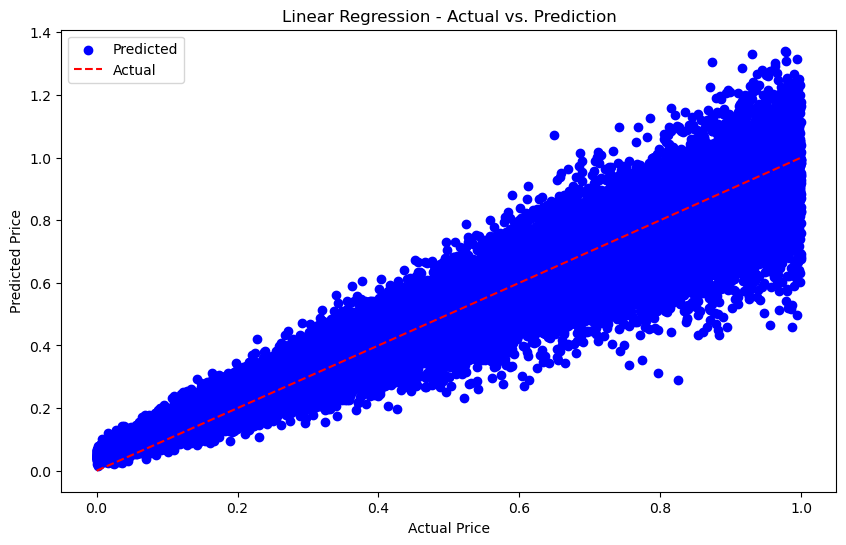

Ridge Regression - MSE: 0.008381089169961338, R2 Score: 0.899208213825912


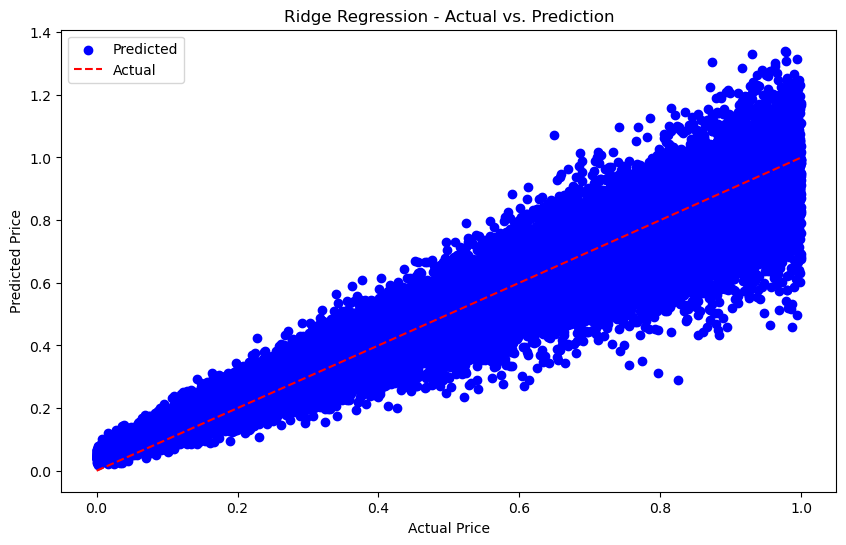

Decision Tree - MSE: 0.01459047284574815, R2 Score: 0.8245335672458585


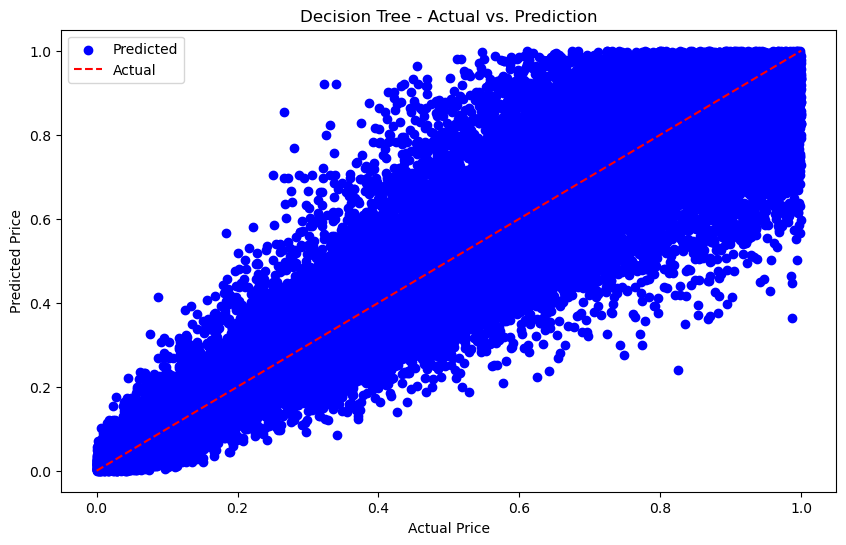

Random Forest - MSE: 0.007146820921567681, R2 Score: 0.914051642746754


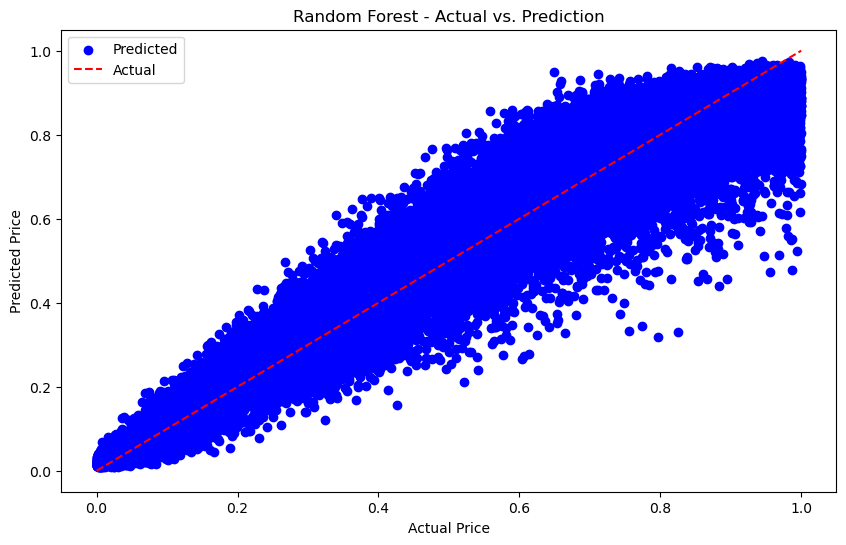

Grandient Boosting - MSE: 0.006809689098096341, R2 Score: 0.9181060225504664


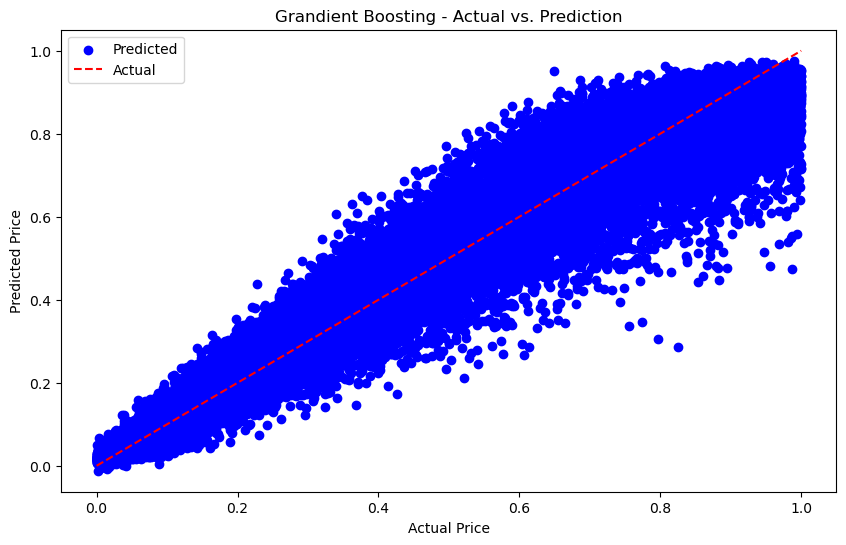

In [78]:
#Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")
    plt.figure(figsize=(10,6))
    plt.scatter(y_test,y_pred,color='blue', label='Predicted')
    plt.plot([min(y_test),max(y_test)],[min(y_test), max(y_test)],color= 'red',linestyle='--', label= 'Actual')
    plt.title(f'{name} - Actual vs. Prediction')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.show()
#Grandient Boosting model performs best in predicting target variable.   
    